In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from functools import reduce
from datetime import datetime
import tweepy 
import json 
import re
import seaborn as sns



## Gathering Data
 + **Twitter archive file** (udacity resources)
 >  Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).  
 
 
 + **Tweet Image prediction**(download from the URL)
 > The tweet image predictions contain what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. Since the file is hosted on Udacity's servers and should be downloaded using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv.
 
 
 + **Twitter API file**(udacity resources)
 > The file contains tweet id, favorite count and retweet count. Data has downloaded manually.

## Twitter Archive

In [2]:
# Loading twitter archive
archive_df = pd.read_csv("twitter-archive-enhanced.csv")

# Set tweet id column as index
archive_df.set_index("tweet_id", inplace = True)
archive_df.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Image Prediction

In [3]:
# Downloading the image predictions file using URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' , 'wb') as file:
    preds = requests.get(url)
    file.write(preds.content)

# load image predictions
img_pred = pd.read_csv('image-predictions.tsv', sep = '\t')

# Set tweet id column as index
img_pred.set_index("tweet_id", inplace = True)


img_pred.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Twitter API

In [4]:
# load twitter API data
with open('tweet-json.txt') as f:
    api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

# change column names
api.columns = ['tweet_id', 'favorites', 'retweets']
# use tweet id column as index
api.set_index('tweet_id', inplace = True)
# display few lines
api.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


# Accessing Data

## Twitter archive


In [5]:
def data_info(data):
    
    # Shape
    print("Shape of data: {}".format(data.shape))
    
    #Duplicates
    print("\n\nDuplicates : ",sum(data.duplicated()))
    
    #Checking the index is finite
    if data.index.is_unique:
        print("\n\nThe index is \033[1;3m unique \033[0m")
    else:
        print('\n\nThe index is \033[1;3m not unique \033[0m')
    
    # print only missing values
    print(" \033[1;3m \n\nMissing values:  \033[0m")
    missing_col =[]
    for col in data.columns:
        if data[col].isna().sum() > 0:
            print(col,':',data[col].isna().sum())
            missing_col.append(col)
    if len(missing_col) == 0:
        print('No missing values')
    print('\n\n')
    
    # Datatype
    print("\033[1;3m Datatype of each colum  \033[0m \n ",data.dtypes)
    
    #\033[1;3m' and '\033[0m

In [6]:
data_info(archive_df)

Shape of data: (2356, 16)


Duplicates :  0


The index is  unique 
  

Missing values:  
in_reply_to_status_id : 2278
in_reply_to_user_id : 2278
retweeted_status_id : 2175
retweeted_status_user_id : 2175
retweeted_status_timestamp : 2175
expanded_urls : 59



 Datatype of each colum   
  in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object


In [7]:
# Checking if a dog belong to multiple category
category = list(archive_df.columns[-4:])

#creating a copy
archive_df_cat = archive_df.copy()

for cat in category:
    archive_df_cat[cat] = archive_df_cat[cat].replace('None',np.nan)
    archive_df_cat[cat] = archive_df_cat[cat].replace(cat,1)

archive_df_cat['Number_of_category'] = archive_df_cat.loc[:,category].sum(axis = 1)
archive_df_cat['Number_of_category'].value_counts()

0.0    1976
1.0     366
2.0      14
Name: Number_of_category, dtype: int64

In [8]:
# Checking for invalid denominators:
""" Denominators that are = 10 are considered valid data and the rest are considered invalid data """

print("Valid rows :",archive_df[archive_df['rating_denominator'] == 10].shape[0])
print("Invalid rows :",archive_df[archive_df['rating_denominator'] != 10].shape[0])

Valid rows : 2333
Invalid rows : 23


In [9]:
# Popular names 
archive_df.name.value_counts().nlargest(5)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Name: name, dtype: int64

In [10]:
# Highest Ratings
top_rating_index = archive_df[archive_df['rating_denominator'] ==10]['rating_numerator'].nlargest(10).index

archive_df[['text','rating_numerator', 'rating_denominator']].filter(items=top_rating_index, axis=0)

,text,rating_numerator,rating_denominator
tweet_id,,,
749981277374128128,This is Atticus. He's quite simply America af....,1776,10
855860136149123072,@s8n You tried very hard to portray this good ...,666,10
855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10...,420,10
670842764863651840,After so many requests... here you go.\n\nGood...,420,10
838150277551247360,@markhoppus 182/10,182,10
832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75,10
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
680494726643068929,Here we have uncovered an entire battalion of ...,26,10


In [11]:
# check for any float ratings in the text column
archive_df_cpy = archive_df.copy()

archive_df_cpy['rating_extract']=archive_df_cpy['text'].str.extract(r"(\d+\.\d*\/\d+)")
archive_df_cpy[archive_df_cpy.rating_extract.notnull()][['text', 'rating_numerator', 'rating_denominator','rating_extract']]

,text,rating_numerator,rating_denominator,rating_extract
tweet_id,,,,
883482846933004288,This is Bella. She hopes her smile made you sm...,5,10,13.5/10
832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",75,10,9.75/10
786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75,10,9.75/10
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,11.27/10
681340665377193984,I've been told there's a slight possibility he...,5,10,9.5/10
680494726643068929,Here we have uncovered an entire battalion of ...,26,10,11.26/10


In [12]:
print('Multiple urls for a tweet:',archive_df_cpy[archive_df_cpy['expanded_urls'].str.contains(',', na=False)]['expanded_urls'].count())

Multiple urls for a tweet: 639


#### Quality & Tidiness issues with the Twitter_archive:
>+ Incorrect datatype for the timestamp column. Represented as object datatype.
>+ Few of the tweets in the file are retweets and replies and they can be removed.
>+ There are few tweets were denominator is not equal to 10 (23 rows).
>+ Ratings with the floating values are extracted incorrectly.
>+ There are 1976 tweets were dog dosen't belong to any category.
>+ There are 639 tweets thata has multiple URL.

## Image predictions

In [13]:
data_info(img_pred)

Shape of data: (2075, 11)


Duplicates :  66


The index is  unique 
  

Missing values:  
No missing values



 Datatype of each colum   
  jpg_url     object
img_num      int64
p1          object
p1_conf    float64
p1_dog        bool
p2          object
p2_conf    float64
p2_dog        bool
p3          object
p3_conf    float64
p3_dog        bool
dtype: object


In [14]:
#Columns to check
pred_cols = ['p1_dog', 'p2_dog', 'p3_dog']
confidence_cols = ['p1_conf', 'p2_conf', 'p3_conf']

# Number of dog classified
for dog, conf in zip(pred_cols, confidence_cols):
    
    print('Avg. Confidence of dog classified correctly:', round(img_pred[img_pred[dog] == True][conf].mean(),2))
    print(dog," :\n", img_pred[dog].value_counts())
    print('\n')

Avg. Confidence of dog classified correctly: 0.61
p1_dog  :
 True     1532
False     543
Name: p1_dog, dtype: int64


Avg. Confidence of dog classified correctly: 0.14
p2_dog  :
 True     1553
False     522
Name: p2_dog, dtype: int64


Avg. Confidence of dog classified correctly: 0.06
p3_dog  :
 True     1499
False     576
Name: p3_dog, dtype: int64




### Quality and Tidiness issues in the Image prediction

>+ The mani data i.e, twitter_archive data has 2356 entries. wheres the subset of the data i.e., Image predction has only 2075
>+ There are 66 duplicates in the data.
>+ Each columns has appropriate datatype
>+ On an average 1528 predictions were classified as dog and 547 were not classified as dog.
>+ The average prediction rate to be classified during p1>p2>p3.
>+ The dataset should merged with the archive dataset.

## Twitter API

In [15]:
data_info(api)

Shape of data: (2354, 2)


Duplicates :  1


The index is  unique 
  

Missing values:  
No missing values



 Datatype of each colum   
  favorites    int64
retweets     int64
dtype: object


### Quality & Tidiness in the API dataset
>+ This data set has 2 entries less than twitter archive dataset. which is acceptable.
>+ There is one duplicate.
>+ The datatypes are appropriate for each column.

# Cleaning

## Twitter Archive
>+ Removing retweets and inappropriate columns.
>+ Combining classification (doggo, pupper, floofer, puppo) to one column.
>+ Correcting the datetype of timestamp column.
>+ Correct rating when there is a float in the numerator.
>+ New column rating (numerator / denominator)
>+ Removing unwanted rows (denominator != 10) and columns (doggo, puppo, pupper, fluffer)
>+ Fixing the expanded URL's columns

#### Removing retweets and inappropriate columns

In [16]:
# Removing retweets and inappropriate columns

# creating a copy of the data
archive_df_clean = archive_df.copy()

# Table info before updating
print("Before")
print("shape :", archive_df_clean.shape)
print("Retweets (to be removed) : ",archive_df_clean[~archive_df_clean['retweeted_status_id'].isnull()].shape[0])

# updating the table with no retweets
archive_df_clean = archive_df_clean[archive_df_clean['retweeted_status_id'].isnull()]

# Removing columns
archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

# Table info after updating
print("\n\nAfter")
print("shape :", archive_df_clean.shape)



Before
shape : (2356, 16)
Retweets (to be removed) :  181


After
shape : (2175, 11)


#### Combining classification (doggo, pupper, floofer, puppo) to one column.

In [17]:
# Combining classification (doggo, pupper, floofer, puppo) to one column.

# Dog category
category = list(archive_df_clean.columns[-4:])

# Replacing the None with None to determine how many category  a dog belogs to 
for cat in category:
    archive_df_clean[cat] = archive_df_clean[cat].replace('None',np.nan)
    
archive_df_clean['Number_of_category'] = archive_df_clean.loc[:,category].count(axis = 1)

# Combining all category colum to one
for index, column in archive_df_clean.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(archive_df_clean.loc[index, 'text']).lower():
            archive_df_clean.loc[index, 'category'] = word.title()

#Updating the dogs with two category
two_cats = archive_df_clean[archive_df_clean.Number_of_category >1]

for index,columns in two_cats.iterrows():
    cat = ' '
    if two_cats.loc[index,'doggo'] == 'doggo':
        cat+='Doggo/'
    if two_cats.loc[index,'floofer'] == 'floofer':
        cat+='Floofer'
    if two_cats.loc[index,'pupper'] == 'pupper':
        cat+='Pupper'
    if two_cats.loc[index,'puppo'] == 'puppo':
        cat+='Puppo'
    archive_df_clean.at[index,'category'] =cat
            

In [18]:
archive_df_clean[archive_df_clean.Number_of_category ==1][['doggo', 'floofer', 'pupper', 'puppo','category']].sample(1)

,doggo,floofer,pupper,puppo,category
tweet_id,,,,,
678278586130948096,NaN,NaN,pupper,NaN,Pupper


In [19]:
archive_df_clean[archive_df_clean.Number_of_category ==2][['doggo', 'floofer', 'pupper', 'puppo','category']].sample(1)

,doggo,floofer,pupper,puppo,category
tweet_id,,,,,
759793422261743616,doggo,NaN,pupper,NaN,Doggo/Pupper


#### Correcting the datetype of timestamp column

In [20]:
# Correcting the datetype of timestamp column
archive_df_clean.timestamp = pd.to_datetime(archive_df_clean.timestamp)
archive_df_clean.dtypes

timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
Number_of_category                  int64
category                           object
dtype: object

#### Correct rating when there is a float in the numerator

In [21]:
# Correct rating when there is a float in the numerator

# converting the datatype to hold the float values
archive_df_clean['rating_numerator'] = archive_df_clean['rating_numerator'].astype(float)
archive_df_clean['rating_denominator'] = archive_df_clean['rating_denominator'].astype(float)

float_ratings = archive_df_clean.copy()
float_ratings['rating_extract']=float_ratings['text'].str.extract(r"(\d+\.\d*\/\d+)")

index = float_ratings[~float_ratings['rating_extract'].isnull()].index
ratings = float_ratings[~float_ratings['rating_extract'].isnull()].rating_extract.values

for i,ind in enumerate(index):
    archive_df_clean.at[ind,'rating_numerator'], archive_df_clean.at[ind,'rating_denominator'] = ratings[i].split('/')

In [22]:
archive_df_clean[archive_df_clean['rating_numerator'] == 13.50]

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Number_of_category,category
tweet_id,,,,,,,,,,,,,
883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10.0,Bella,NaN,NaN,NaN,NaN,0,NaN


#### New colum Rating

In [23]:
# New colum rating
archive_df_clean['rating'] = archive_df_clean['rating_numerator'] / archive_df_clean['rating_denominator']
archive_df_clean.head(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Number_of_category,category,rating
tweet_id,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,0,NaN,1.3
892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,0,NaN,1.3
891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN,0,NaN,1.2


#### Removing inappropriate columns & rows

In [24]:
print("Valid rows :",archive_df_clean[archive_df_clean['rating_denominator'] == 10].shape[0])
print("Invalid rows :",archive_df_clean[archive_df_clean['rating_denominator'] != 10].shape[0])

Valid rows : 2153
Invalid rows : 22


In [25]:
# Removing inappropriate columns

# row with inf
drop_row = list(archive_df_clean[archive_df_clean.rating_denominator == archive_df_clean.rating_denominator.min()].index)

#Dropping inappropriate rows
ratings_checked = archive_df_clean[archive_df_clean.rating_denominator != 10].index
ratings_modified = [740373189193256964, 722974582966214656 , 716439118184652801 , 682962037429899265,666287406224695296] # ratings extracted incorrectly 


drop_row.extend(ratings_checked.difference(ratings_modified))
drop_row = archive_df_clean.loc[drop_row,:].index

archive_df_clean.drop(drop_row, axis=0, inplace=True)

#Dropping inappropriate columns
archive_df_clean.drop(['source','doggo', 'floofer', 'pupper', 'puppo', 'Number_of_category'], axis = 1, inplace = True)

# Mannual update for incorrect extracts
archive_df_clean.loc[740373189193256964, 'rating_denominator'] = 10
archive_df_clean.loc[740373189193256964, 'rating_numerator'] = 14

archive_df_clean.loc[722974582966214656, 'rating_denominator'] = 10
archive_df_clean.loc[722974582966214656, 'rating_numerator'] = 13

archive_df_clean.loc[716439118184652801, 'rating_denominator'] = 10
archive_df_clean.loc[716439118184652801, 'rating_numerator'] = 11

archive_df_clean.loc[682962037429899265, 'rating_denominator'] = 10
archive_df_clean.loc[682962037429899265, 'rating_numerator'] = 10

archive_df_clean.loc[666287406224695296, 'rating_denominator'] = 10
archive_df_clean.loc[666287406224695296, 'rating_numerator'] = 9


In [26]:
print("Valid rows :",archive_df_clean[archive_df_clean['rating_denominator'] == 10].shape[0])
print("Invalid rows :",archive_df_clean[archive_df_clean['rating_denominator'] != 10].shape[0])

Valid rows : 2158
Invalid rows : 0


#### Fixing expanded urls 

In [27]:

for index, column in archive_df_clean.iterrows():
    archive_df_clean.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)+'/photo/1'

archive_df_clean['category'] = archive_df_clean['category'].replace(np.nan,'None')

data_info(archive_df_clean)

Shape of data: (2158, 8)


Duplicates :  0


The index is  unique 
  

Missing values:  
No missing values



 Datatype of each colum   
  timestamp             datetime64[ns, UTC]
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
category                           object
rating                            float64
dtype: object


In [28]:
archive_df_clean.head()

,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,category,rating
tweet_id,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,1.3
892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,1.3
891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,1.2
891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,1.3
891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,1.2


## Image Prediction
>+ Drop the duplicate rows.
>+ Rename the columns with appropriate names.
>+ Remove "_" in the p1,p2 and p3.
>+ wrangle the prediction 
>+ Drop inappropriate rows.

In [29]:
data_info(img_pred)

Shape of data: (2075, 11)


Duplicates :  66


The index is  unique 
  

Missing values:  
No missing values



 Datatype of each colum   
  jpg_url     object
img_num      int64
p1          object
p1_conf    float64
p1_dog        bool
p2          object
p2_conf    float64
p2_dog        bool
p3          object
p3_conf    float64
p3_dog        bool
dtype: object


#### Droping the duplicate rows

In [30]:
# Copy of the data 
img_pred_clean = img_pred.copy()

print('Before')
print("Shape :", img_pred_clean.shape)
print("Duplicates : ", sum(img_pred_clean.duplicated()))

# Dropping the duplicates
img_pred_clean = img_pred_clean.drop_duplicates(subset=['jpg_url'], keep = 'first')


print('\n\nAfter')
print("Shape :", img_pred_clean.shape)

Before
Shape : (2075, 11)
Duplicates :  66


After
Shape : (2009, 11)


#### Renaming columns

In [31]:
print('Before')
print("columns :", img_pred_clean.columns.values)

# Renaming
img_pred_clean.rename(columns = {'p1':'1st_prediction', 'p1_conf':'1st_confidence', 'p1_dog':'1st_pred_IsDog',
                                                           'p2':'2nd_prediction', 'p2_conf':'2nd_confidence', 'p2_dog':'2nd_pred_IsDog',
                                                           'p3':'3rd_prediction', 'p3_conf':'3rd_confidence', 'p3_dog':'3rd_pred_IsDog'}, inplace = True)

print('\n\nAfter')
print("columns :", img_pred_clean.columns.values)

Before
columns : ['jpg_url' 'img_num' 'p1' 'p1_conf' 'p1_dog' 'p2' 'p2_conf' 'p2_dog' 'p3'
 'p3_conf' 'p3_dog']


After
columns : ['jpg_url' 'img_num' '1st_prediction' '1st_confidence' '1st_pred_IsDog'
 '2nd_prediction' '2nd_confidence' '2nd_pred_IsDog' '3rd_prediction'
 '3rd_confidence' '3rd_pred_IsDog']


#### Remove "_" in the p1,p2 and p3

In [32]:
# columns with dog breed
dog_prediciton = ['1st_prediction', '2nd_prediction', '3rd_prediction']

# remove underscore and capitalize the first letter of each word 
for column in dog_prediciton:
    img_pred_clean[column] = img_pred_clean[column].str.replace('_', ' ').str.title()

In [33]:
img_pred_clean.head(3)

,jpg_url,img_num,1st_prediction,1st_confidence,1st_pred_IsDog,2nd_prediction,2nd_confidence,2nd_pred_IsDog,3rd_prediction,3rd_confidence,3rd_pred_IsDog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


#### Wrangle the prediction

In [34]:
def get_breed(index):
    if img_pred_clean.loc[index,'1st_pred_IsDog'] == True:
        img_pred_clean.at[index, 'predicted_breed'] = img_pred_clean.loc[index,'1st_prediction']
        img_pred_clean.at[index, 'prediction_confidence'] = img_pred_clean.loc[index,'1st_confidence']
        return 
    if img_pred_clean.loc[index,'2nd_pred_IsDog'] == True:
        img_pred_clean.at[index, 'predicted_breed'] = img_pred_clean.loc[index,'2nd_prediction']
        img_pred_clean.at[index, 'prediction_confidence'] = img_pred_clean.loc[index,'2nd_confidence']
        return 
    if img_pred_clean.loc[index,'3rd_pred_IsDog'] == True:
        img_pred_clean.at[index, 'predicted_breed'] = img_pred_clean.loc[index,'3rd_prediction']
        img_pred_clean.at[index, 'prediction_confidence'] = img_pred_clean.loc[index,'3rd_confidence']
        return 
    return np.nan, np.nan


for index, column in img_pred_clean.iterrows():
    get_breed(index)

In [35]:
img_pred_clean[img_pred_clean['1st_pred_IsDog']== False].head(5)

,jpg_url,img_num,1st_prediction,1st_confidence,1st_pred_IsDog,2nd_prediction,2nd_confidence,2nd_pred_IsDog,3rd_prediction,3rd_confidence,3rd_pred_IsDog,predicted_breed,prediction_confidence
tweet_id,,,,,,,,,,,,,
666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False,NaN,NaN
666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True,Golden Retriever,0.007959
666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,Hen,0.965932,False,Cock,0.033919,False,Partridge,0.000052,False,NaN,NaN
666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,Desktop Computer,0.086502,False,Desk,0.085547,False,Bookcase,0.079480,False,NaN,NaN
666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,Three-Toed Sloth,0.914671,False,Otter,0.015250,False,Great Grey Owl,0.013207,False,NaN,NaN


#### Drop inappropriate rows & columns

In [36]:
# drop columns
img_pred_clean.drop(['img_num','1st_prediction','1st_confidence','1st_pred_IsDog'
                                    ,'2nd_prediction','2nd_confidence','2nd_pred_IsDog',
                                     '3rd_prediction','3rd_confidence','3rd_pred_IsDog'], axis=1, inplace=True)

# drop rows (if the predicitions are not dog then it is a NaN value)
img_pred_clean.dropna(inplace= True)


img_pred_clean.head(3)

,jpg_url,predicted_breed,prediction_confidence
tweet_id,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461


In [37]:
data_info(img_pred_clean)

Shape of data: (1691, 3)


Duplicates :  0


The index is  unique 
  

Missing values:  
No missing values



 Datatype of each colum   
  jpg_url                   object
predicted_breed           object
prediction_confidence    float64
dtype: object


## Twitter API
>+ Drop duplicate row

In [38]:
data_info(api)

Shape of data: (2354, 2)


Duplicates :  1


The index is  unique 
  

Missing values:  
No missing values



 Datatype of each colum   
  favorites    int64
retweets     int64
dtype: object


In [39]:
api_clean = api.copy()

#Dropping duplicate
api_clean = api_clean.drop_duplicates(keep = 'first')

data_info(api_clean)

Shape of data: (2353, 2)


Duplicates :  0


The index is  unique 
  

Missing values:  
No missing values



 Datatype of each colum   
  favorites    int64
retweets     int64
dtype: object


# Storing 

In [40]:
df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), [archive_df_clean, img_pred_clean, api_clean])

df.head(3)

,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,category,rating,jpg_url,predicted_breed,prediction_confidence,favorites,retweets
tweet_id,,,,,,,,,,,,,
892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,33819,6514
891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,25461,4328
891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever,0.168086,42908,8964


In [47]:
data_info(df)

Shape of data: (1674, 13)


Duplicates :  0


The index is  unique 
  

Missing values:  
No missing values



 Datatype of each colum   
  timestamp                datetime64[ns, UTC]
text                                  object
expanded_urls                         object
rating_numerator                     float64
rating_denominator                   float64
name                                  object
category                              object
rating                               float64
jpg_url                               object
predicted_breed                       object
prediction_confidence                float64
favorites                              int64
retweets                               int64
dtype: object


In [41]:
#Store the clean DataFrame in a CSV file
df.to_csv('twitter_archive_master.csv')

# Visualizing

In [42]:
# Barchart
def barplot(x , y, color = '#79DAE8', orient = None, order = None, palette = None, xlabel = None, ylabel = None, title = None):
    fig, ax = plt.subplots(figsize = (15,12))
    ax = sns.barplot(x=x, y = y,  color = color, order=order,palette = palette, orient = orient)
    ax.bar_label(ax.containers[0])
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    if title is not None:
        plt.title(title)
    sns.despine(bottom = True, left = True)
    plt.show()
    

### Top 15 predicted dogs
> + **Golden Retriever, Labrador Retriever, Pembroke, and Chihuahua**  is the highly predicted dog

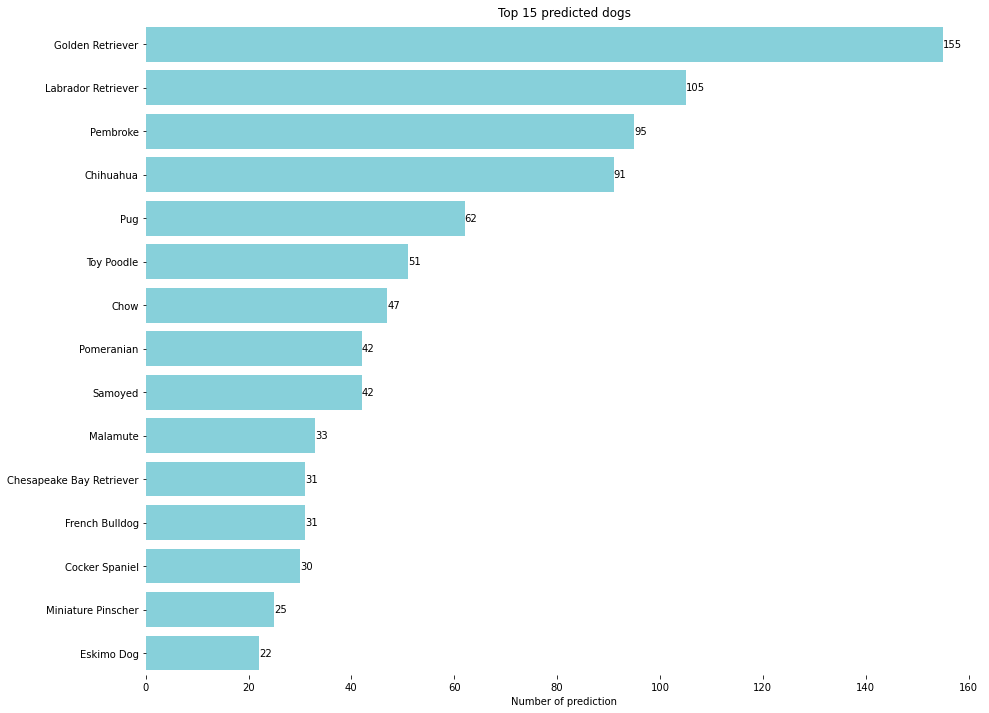

In [43]:
barplot (df['predicted_breed'].value_counts().nlargest(15).values, 
             df['predicted_breed'].value_counts().nlargest(15).index,  
             orient='h', title = 'Top 15 predicted dogs', xlabel= 'Number of prediction') 

### Most popular catergory
> + **Pupper** is the most popular category that was rated by the WeRateDogs

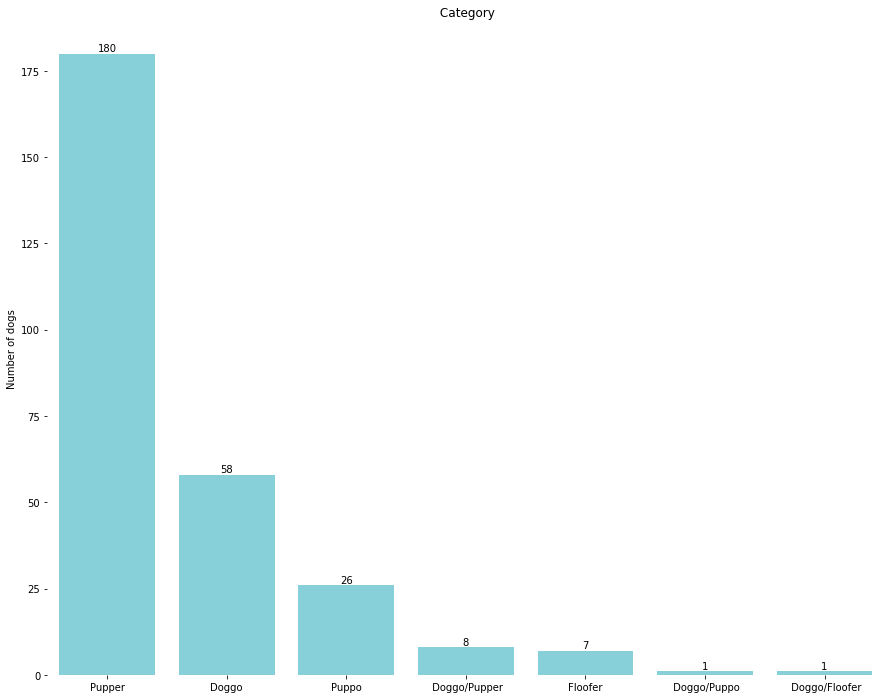

In [44]:
barplot (
             df['category'].value_counts().nlargest(15)[1:].index,  
             df['category'].value_counts().nlargest(15)[1:].values, 
             orient='v', title = ' Category', ylabel = 'Number of dogs' ) 

### Top Retweeted dog
> + **Labrador Retiver** is the most retweeted dog with 131075 favourites.

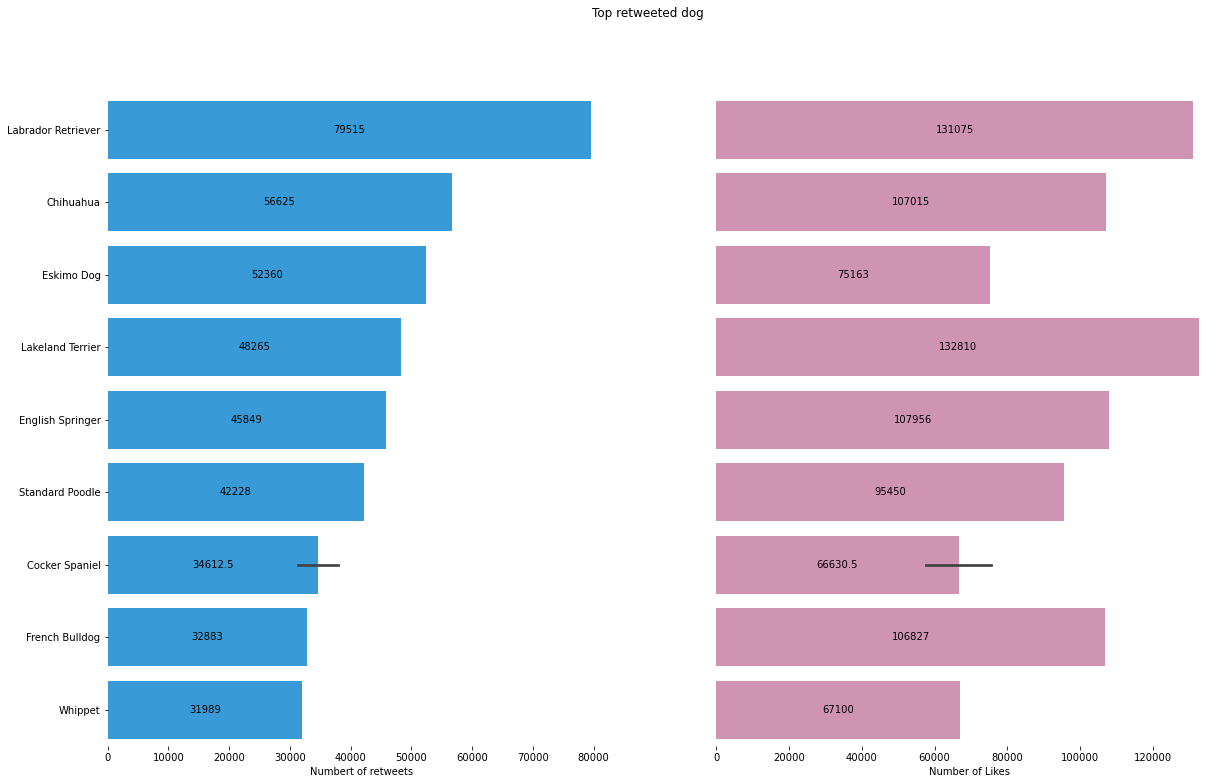

In [45]:
# Subplots
fig, ax = plt.subplots(1,2,figsize = (20,12))
fig.suptitle('Top retweeted dog')


# Plot 1
p1 = sns.barplot (y = df.nlargest(10,'retweets')['predicted_breed'].values, x = df.nlargest(10,'retweets')['retweets'].values, 
                            orient='h', ax = ax[0], color = '#1DA1F2')
p1.bar_label(p1.containers[0], label_type = 'center')
p1.set_xlabel('Numbert of retweets')


# Plot 2
p2 = sns.barplot (y = df.nlargest(10,'retweets')['predicted_breed'].values, x = df.nlargest(10,'retweets')['favorites'].values, orient='h', ax = ax[1] , color = '#D989B5')
p2.set_xlabel('Number of Likes')
p2.bar_label(p2.containers[0], label_type= 'center')
p2.set(yticks = [])
p2.set(ylabel = '')

sns.despine(bottom = True, left = True)
plt.show()

### Popularity of the account
> + We see an upward trend overtime which clearly defines the account has become popular in 2 years of time

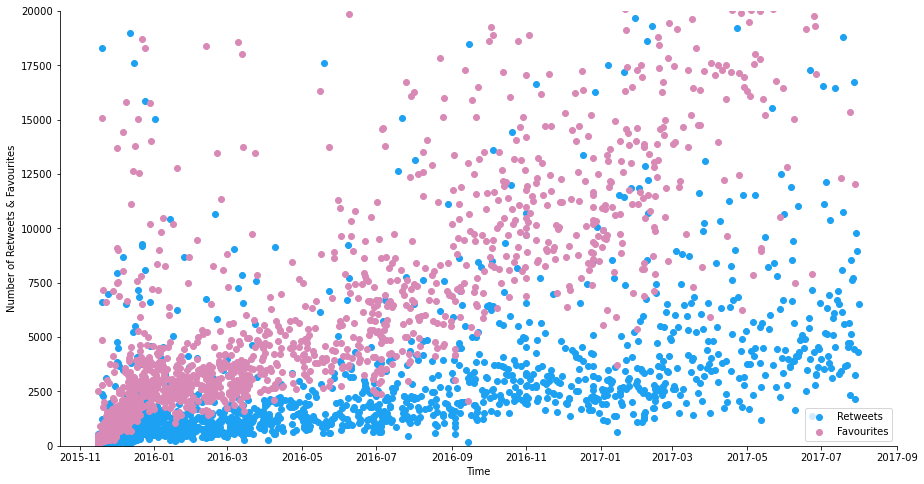

In [46]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x=df.timestamp,y=df.retweets, c = '#1DA1F2', label = 'Retweets')
ax.scatter(x=df.timestamp,y=df.favorites, c = '#D989B5', label = 'Favourites')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_ylim([0,20000])
ax.set_xlabel('Time')
ax.set_ylabel('Number of Retweets & Favourites')
ax.legend();

**Analysis by: [Stimson A](https://www.linkedin.com/in/a-stimson/)**
<center><h2> Thank you!!